## Task 1: Introduction

Welcome to this project on how to avoid overfitting with regularization. We will take a look at two types of regularization techniques: weight regularization and dropout regularization.

![Overfitting](images/overfitting.png)


## Task 2: Importing the Data
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [1]:
from tensorflow.python.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

In [2]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


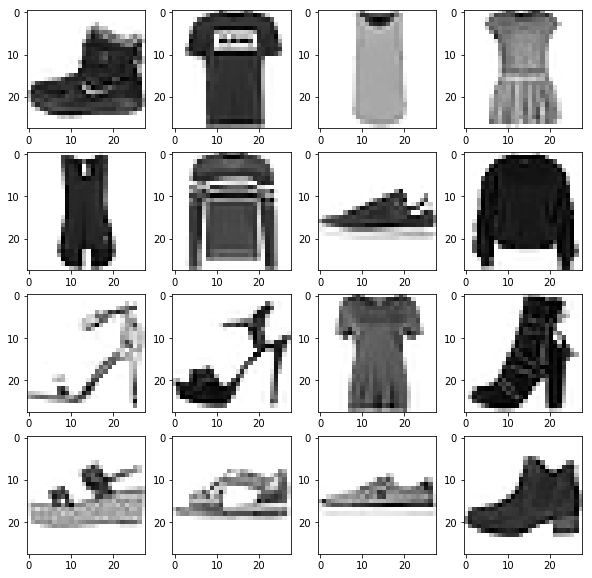

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)#rows,columns,index
    plt.imshow(X_train[i], cmap='binary')#because grey scale images(color map)
plt.show()

## Task 3: Processing the Data
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___
Original Label: \[5\] is converted to -> One Hot Encoded Label: \[0, 0, 0, 0, 0, 1, 0, 0, 0, 0\]

In [4]:
from tensorflow.python.keras.utils import to_categorical
y_train= to_categorical(y_train)#gives back one hot encoded representation
y_test= to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train[0])

(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [5]:
import numpy as np
X_train= np.reshape(X_train, (60000, 28*28))#
X_test= np.reshape(X_test, (10000, 28*28))

#normalize data
X_train= X_train/255.
X_test= X_test/255.

We use algorithms like gradient descent to find optimal values for weights and biases. Optimization algorithm learns values by trying to reduce the overall loss value for the model. If loss reduces with more training then we are moving in the right direction. For every iteration of training we compute loss value and update parameter values to try and move towards a lower loss value. Cause of overfitting- Parameters can become large(some) and influence outputs. L2 normalization- adds some loss to the loss therefore forces the weight values to become low.

## Task 4: Regularization and Dropout
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

![Neural Network](images/neural_network.png)

#### Dropouts:

![Dropouts](images/dropouts.png)


## Task 5: Creating the Experiment Part 1
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

If we apply dropout to a hidden layer. During training some nodes of this layer will be randomly selected and will be removed from the network. By doing this we are forcing the model to not assign large values to any particular weights.

In [6]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.regularizers import l2

nodes= 64

def create_model(weight_reg= False, dropout_reg=False):
    model= Sequential()  
    if weight_reg:
        model.add(Dense(nodes, activation='relu',
                       input_shape= (784,), kernel_regularizer= l2(0.001)))
        #regularization penalty=0.001
        model.add(Dense(nodes, activation='relu', kernel_regularizer=l2(0.001)))
    else:
        model.add(Dense(nodes, activation='relu', input_shape=(784,)))
        model.add(Dense(nodes, activation='relu'))
    if dropout_reg:
        model.add(Dropout(0.2))
        #20 percent of nodes of preceding layer will be deactivated
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    #adaptive moment estimation
    model.summary()
    return model

## Task 6: Creating the Experiment Part 2
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [7]:
def show_acc(h, E):
    plt.plot(range(E), h.history['acc'], label='Training')
    plt.plot(range(E), h.history['val_acc'], label='Validation')
    plt.ylim([0.7, 1.0])
    plt.legend()
    plt.show()
    return

In [8]:
from tensorflow.python.keras.callbacks import LambdaCallback

simple_log= LambdaCallback(on_epoch_end= lambda e, l: print(e, end='.'))

def run_experiment(E=20, weight_reg= False, dropout_reg=False):
    m= create_model(weight_reg, dropout_reg)
    h= m.fit(X_train, y_train, epochs=E, verbose=False, validation_data=(X_test, y_test),
             callbacks= [simple_log])
    show_acc(h,E)
    return

## Task 7: Results
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

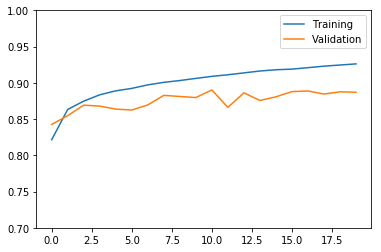

In [9]:
run_experiment()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

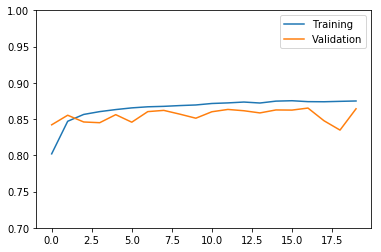

In [11]:
run_experiment(weight_reg= True, dropout_reg=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

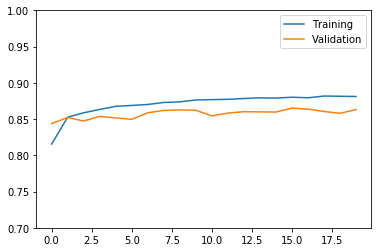

In [12]:
run_experiment(weight_reg= True, dropout_reg=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

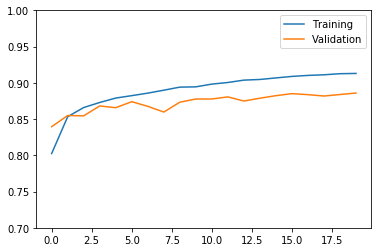

In [13]:
run_experiment(weight_reg= False, dropout_reg=True)